In [22]:
import pickle
import matplotlib
matplotlib.use('TkAgg')

path = '/nfs/kun1/users/stephentian/on_policy_longer_1_26_buffers/move_tool_obj_together_fixed_6_2_train.pkl'
data = pickle.load(open(path, 'rb'))

In [23]:
data._obs['image'].shape

(20483, 12288)

In [24]:
import time

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

import torchvision.transforms.functional as F
from PIL import Image

def tellme(s):
    print(s)
    plt.title(s, fontsize=16)
    plt.draw()

plt.clf()
plt.setp(plt.gca(), autoscale_on=True)

[None]

In [25]:
def plot(obs_img):
    if type(obs_img) == torch.Tensor:
        from torchvision import transforms
        im_new = transforms.ToPILImage()(obs_img.cpu())
    else:
        im_new = obs_img
    plt.imshow(im_new)
    return im_new

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import torch
print(data._obs['image'][0].shape)
image_dataset = torch.from_numpy(data._obs['image'][0].reshape(3,64,64))
tellme('Dataset Image')
im_new= plot(image_dataset)
im_new.save('dataset_img.jpg')
# plt.show()

(12288,)
Dataset Image


Current Image


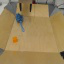

In [27]:
from PIL import Image
from torch import tensor
image_curr = Image.open('/home/stephen/ros_ws/src/private_visual_foresight/experiments/sawyer/offline_rl_tool/galar/train/collection_started_Jun_10_2021_20:51:32/traj0/images0/im_1.jpg')
trans = transforms.ToPILImage()
trans1 = transforms.ToTensor()
image_curr = trans1(image_curr.convert("RGB"))
tellme('Current Image')
plot(image_curr)
# plt.show()

In [28]:
while True:
    pts = []
    while len(pts) < 4:
        plot(image_dataset)
        tellme('Dataset Image: Select 4 corners with mouse')
        pts = np.asarray(plt.ginput(4, timeout=-1))
        if len(pts) < 4:
            tellme('Too few points, starting over')
            time.sleep(1)  # Wait a second
 
    ph = plt.fill(pts[:, 0], pts[:, 1], 'r', lw=2)

    tellme('Happy? Key click for yes, mouse click for no')

    if plt.waitforbuttonpress():
        for p in ph:
            p.remove()
        break

    for p in ph:
        p.remove()

src = pts

Dataset Image: Select 4 corners with mouse
/home/stephen/anaconda2/envs/py35/lib/python3.7/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
Happy? Key click for yes, mouse click for no


In [29]:
src

array([[18.33982684,  1.64718615],
       [59.37878788,  7.18831169],
       [57.12770563, 46.14935065],
       [ 7.43073593, 44.41774892]])

In [30]:
while True:
    pts = []
    while len(pts) < 4:
        plot(image_curr)
        tellme('Current Image: Select 4 corners with mouse')
        pts = np.asarray(plt.ginput(4, timeout=-1))
        if len(pts) < 4:
            tellme('Too few points, starting over')
            time.sleep(1)  # Wait a second
 
    ph = plt.fill(pts[:, 0], pts[:, 1], 'r', lw=2)

    tellme('Happy? Key click for yes, mouse click for no')

    if plt.waitforbuttonpress():
        for p in ph:
            p.remove()
        break

    for p in ph:
        p.remove()

dest = pts

Current Image: Select 4 corners with mouse
Happy? Key click for yes, mouse click for no


In [31]:
dest

array([[16.60822511,  2.85930736],
       [59.20562771, 10.47835498],
       [58.33982684, 50.9978355 ],
       [ 4.48701299, 48.91991342]])

In [32]:
import cv2
matrix_dataset2curr = cv2.getPerspectiveTransform(src.astype(np.float32),dest.astype(np.float32)) #Try this SWAP
matrix_curr2dataset = cv2.getPerspectiveTransform(dest.astype(np.float32),src.astype(np.float32)) #Try this SWAP

In [33]:
matrix_dataset2curr, matrix_curr2dataset

(array([[ 1.11372095e+00, -9.20702297e-03, -3.50371122e+00],
        [ 5.59670203e-02,  1.05841083e+00,  1.40846297e-01],
        [ 1.05113272e-03, -7.97577109e-04,  1.00000000e+00]]),
 array([[ 8.97593907e-01,  1.01768922e-02,  3.14347646e+00],
        [-4.73327100e-02,  9.47522825e-01, -2.99295214e-01],
        [-9.81241796e-04,  7.45025269e-04,  1.00000000e+00]]))

In [34]:
np.save('mat_dataset2curr',matrix_dataset2curr)
np.save('mat_curr2dataset',matrix_curr2dataset)

In [ ]:
#use with image_check.ipynb